In [7]:
from tifffile import imread
import os
import matplotlib.pyplot as plt

Loading TIFF file ...
Full image shape: (86751, 65124, 3)
Loaded ROI shape: (256, 256, 3)


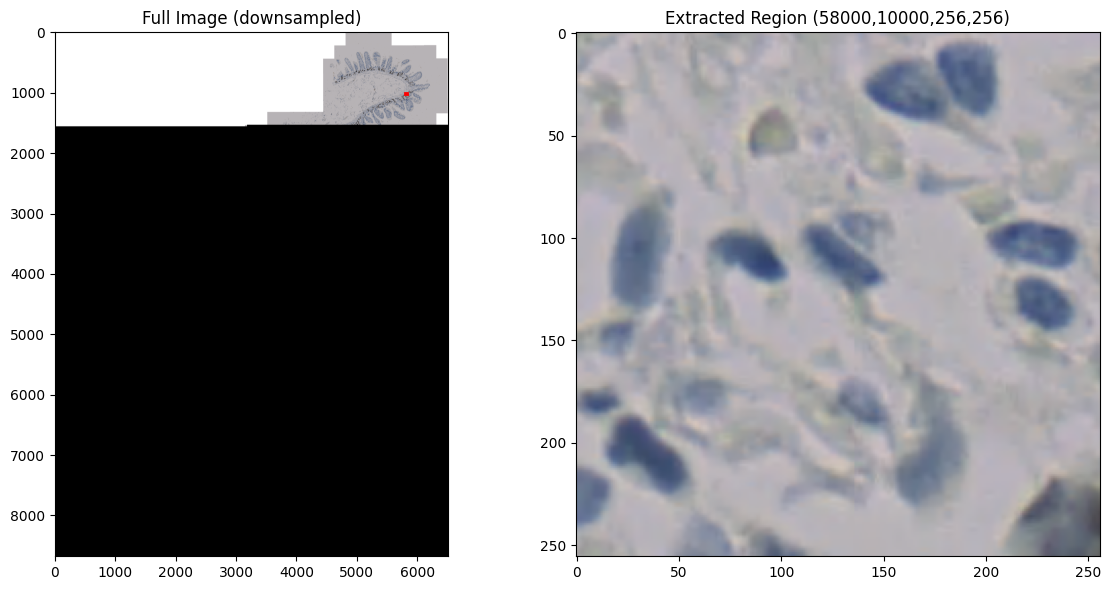

In [37]:
from tifffile import TiffFile


image_path = "test.ome.tif"

# Load TIFF file from tiff_store folder
print("Loading TIFF file ...")
tiff_store_path = os.path.join('../tiff_store', image_path)

# First, check the full image dimensions
with TiffFile(tiff_store_path) as tif:
    page = tif.pages[0]
    full_data = page.asarray(out='memmap')
    print(f"Full image shape: {full_data.shape}")
    
    # Try a smaller region from a different part of the image
    y = 10000  # Try different coordinates
    x = 58000
    width = 256  # Smaller region for testing
    height = 256
    
    # Extract the region of interest
    image = full_data[y:y+height, x:x+width]

image = imread(
    tiff_store_path,
    key=0,  # First image
    out=None,  # Don't use memmap
    aszarr=False,  # Don't use zarr format
)

# Extract the region after loading
image = image[y:y+height, x:x+width]

print(f"Loaded ROI shape: {image.shape}")

# Display both the full image (downsampled) and the extracted region
plt.figure(figsize=(12, 6))

# Show downsampled full image
plt.subplot(1, 2, 1)
# Downsample the full image to display it (every 10th pixel)
plt.imshow(full_data[::10, ::10])
plt.title("Full Image (downsampled)")
plt.axis('on')
# Draw a rectangle to show the ROI location
plt.gca().add_patch(plt.Rectangle((x/10, y/10), width/10, height/10, 
                                 fill=False, edgecolor='red', linewidth=2))

# Show extracted region
plt.subplot(1, 2, 2)
plt.imshow(image)
plt.title(f"Extracted Region ({x},{y},{width},{height})")
plt.axis('on')

plt.tight_layout()

In [30]:
image

memmap([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

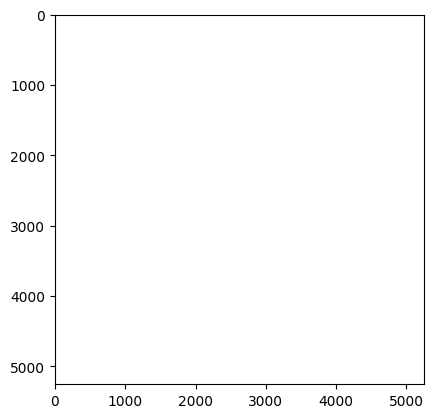

In [31]:
plt.imshow(image)